In [0]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
%matplotlib inline

Ноутбук посвящен работе с геоданными с помощью библиотек shapely и geopandas. 

### Знакомство с shapely

`Shapely` - библиотека для работы с геометрическими объектами

`Geopandas` - pandas, только с гео

`folium` - для визуализации

In [0]:
from shapely.geometry import Point, LineString, Polygon

#### точка

In [0]:
moscow_lon = 37.618423
moscow_lat = 55.751244
point = Point(moscow_lon, moscow_lat)

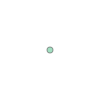

In [0]:
point

In [0]:
print("area ", point.area)
print("length ", point.length)

area  0.0
length  0.0


In [0]:
point.bounds

(37.618423, 55.751244, 37.618423, 55.751244)

#### Линия

In [0]:
moscow_lon = 37.618423
moscow_lat = 55.751244

piter_lon = 30.26417
piter_lat = 59.89444

line = LineString([(moscow_lon, moscow_lat), (piter_lon, piter_lat)])

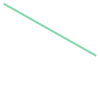

In [0]:
line

bounds - (minx, miny, maxx, maxy) 

In [0]:
line.bounds

(30.26417, 55.751244, 37.618423, 59.89444)

In [0]:
list(line.coords)

[(37.618423, 55.751244), (30.26417, 59.89444)]

#### Полигон

https://boundingbox.klokantech.com/ - сайт для создания bounding box города

In [0]:
polygon = Polygon([(37.3193289,55.489927), 
                   (37.9456611,55.489927),
                   (37.9456611,56.009657),
                   (37.3193289,56.009657)])
print(polygon.area)
print(polygon.length)

0.32552363430599734
2.2921243999999916


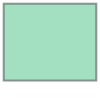

In [0]:
polygon

Границы полигона

In [0]:
polygon.bounds

(37.3193289, 55.489927, 37.9456611, 56.009657)

Для полигона, у которого внутри дырка, можно найти внутренние и внешние границы

In [0]:
list(polygon.exterior.coords)

[(37.3193289, 55.489927),
 (37.9456611, 55.489927),
 (37.9456611, 56.009657),
 (37.3193289, 56.009657),
 (37.3193289, 55.489927)]

In [0]:
list(polygon.interiors)

[]

### Операции с геометрией

<img src=http://docs.qgis.org/testing/en/_images/overlay_operations.png>

intersection

In [0]:
a = Point(0, 0).buffer(1.1)
b = Point(1, 1).buffer(0.7)

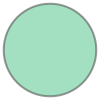

In [0]:
b

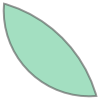

In [0]:
a.intersection(b)

union

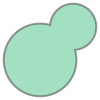

In [0]:
a.union(b)

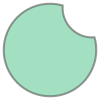

In [0]:
a.difference(b)

contains

In [0]:
polygon.contains(Point(moscow_lon, moscow_lat))

True

In [0]:
polygon.contains(Point(piter_lon, piter_lat))

False

### Geopandas

In [0]:
geo_series = gpd.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
geo_series

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [0]:
geo_series.crs = {'init': 'epsg:4326'}

#### GeoDataFrame

In [0]:
moscow_districts = gpd.read_file('moscow_districts.geojson')

In [0]:
moscow_districts.columns = moscow_districts.columns.str.lower()

In [0]:
moscow_districts.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,women18_55,womenolder,working_ag,geometry
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,14569.0,17651.0,29632.0,"POLYGON ((37.4276499 55.7482092, 37.4284863 55..."
1,ЗелАО,2277.0,11418.0,4116.0,Матушкино,15058.0,19196.0,44258.0,25062.0,6834.0,10948.0,10942.0,22366.0,"POLYGON ((37.1785294 56.0079518, 37.1808275 56..."
2,ЗАО,1054.0,5767.0,1614.0,Внуково,6399.0,9174.0,21378.0,12204.0,3436.0,5775.0,4785.0,11542.0,"(POLYGON ((37.1831699 55.6056473, 37.184554 55..."
3,ЗелАО,1628.0,8830.0,3540.0,Савёлки,12807.0,15214.0,35510.0,20296.0,5494.0,8379.0,9267.0,17209.0,"POLYGON ((37.2094634 56.0008286, 37.2097536 56..."
4,ЗелАО,1822.0,11186.0,4712.0,Силино,15518.0,19343.0,43495.0,24152.0,6587.0,10204.0,10806.0,21390.0,"POLYGON ((37.1316021 56.0164459, 37.1326592 56..."


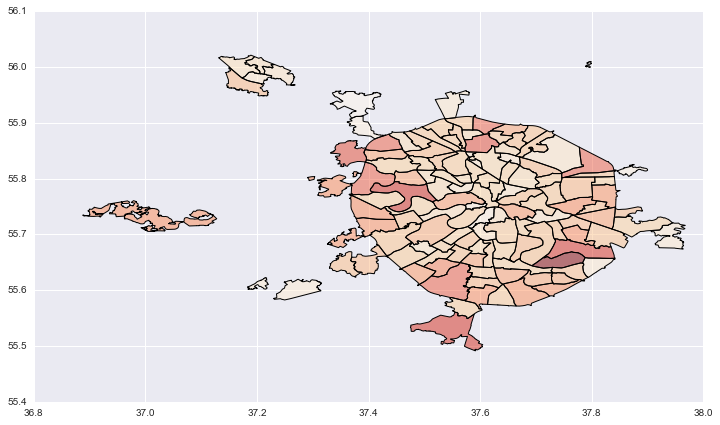

In [0]:
moscow_districts.plot('totalpopul', figsize=(12,10), cmap='OrRd');

#### OpenStreetMap

Скачаем данные по местам из OpenStreetMap на примере Москвы

https://wiki.openstreetmap.org/wiki/Main_Page

`node` - точка, параметры широта и долгота

`way` - линейные объекты, например улица, дорога

`relation` - отношение, для связи между объектами

In [0]:
import requests

https://wiki.openstreetmap.org/wiki/Map_Features - информация по категориям

In [0]:
overpass_url = "https://overpass.kumi.systems/api/interpreter"

overpass_query = """
[out:json];
(
 node["shop"](55.4245,37.0919,56.0671,38.1335);
);
out body;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [0]:
data

{'elements': [{'id': 1000,
   'lat': 55.9950817,
   'lon': 37.2074648,
   'tags': {'comment': 'ООО "АСП-ГРУПП", ИНН 7735108290, до 22:45 c 2014-05-23',
    'name': 'Десяточка',
    'opening_hours': '08:30-22:45',
    'shop': 'supermarket'},
   'type': 'node'},
  {'id': 82788641,
   'lat': 55.5683151,
   'lon': 37.592322,
   'tags': {'amenity': 'fuel',
    'fuel:diesel': 'yes',
    'fuel:octane_92': 'yes',
    'fuel:octane_95': 'yes',
    'fuel:octane_98': 'yes',
    'name': 'BP Бутово',
    'operator': 'BP',
    'shop': 'yes'},
   'type': 'node'},
  {'id': 245868628,
   'lat': 55.9137905,
   'lon': 37.3973647,
   'tags': {'addr:city': 'Химки',
    'addr:housenumber': 'к4',
    'addr:postcode': '141400',
    'addr:street': 'микрорайон ИКЕА',
    'brand': 'Ашан',
    'brand:wikidata': 'Q758603',
    'brand:wikipedia': 'ru:Auchan',
    'contact:facebook': 'https://www.facebook.com/AuchanRussia',
    'contact:instagram': 'https://www.instagram.com/auchan.ru/',
    'contact:twitter': 'https

In [0]:
def get_tag(x, key_name):
    if str(key_name) in x:
        tmp = x[key_name]
        return tmp
    else:
        return "unknown"

In [0]:
loaded = pd.DataFrame(data['elements'])
loaded['shop'] = loaded['tags'].apply(lambda x: get_tag(x, 'shop'))

In [0]:
loaded.head()

,id,lat,lon,tags,type,shop
0,1000,55.995082,37.207465,"{'shop': 'supermarket', 'comment': 'ООО ""АСП-Г...",node,supermarket
1,82788641,55.568315,37.592322,"{'amenity': 'fuel', 'shop': 'yes', 'fuel:octan...",node,yes
2,245868628,55.913790,37.397365,{'contact:youtube': 'https://www.youtube.com/c...,node,supermarket
3,245868630,55.910621,37.399770,"{'addr:postcode': '141400', 'opening_hours': '...",node,furniture
4,245869056,55.911984,37.392815,"{'addr:postcode': '141400', 'opening_hours': '...",node,doityourself


#### Создание geodataframe

In [0]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(loaded.lon, loaded.lat)]
places_geo = gpd.GeoDataFrame(loaded, crs=crs, geometry=geometry)

In [0]:
places_geo.head()

,id,lat,lon,tags,type,shop,geometry
0,1000,55.995082,37.207465,"{'shop': 'supermarket', 'comment': 'ООО ""АСП-Г...",node,supermarket,POINT (37.2074648 55.9950817)
1,82788641,55.568315,37.592322,"{'amenity': 'fuel', 'shop': 'yes', 'fuel:octan...",node,yes,POINT (37.592322 55.5683151)
2,245868628,55.913790,37.397365,{'contact:youtube': 'https://www.youtube.com/c...,node,supermarket,POINT (37.3973647 55.9137905)
3,245868630,55.910621,37.399770,"{'addr:postcode': '141400', 'opening_hours': '...",node,furniture,POINT (37.3997698 55.9106209)
4,245869056,55.911984,37.392815,"{'addr:postcode': '141400', 'opening_hours': '...",node,doityourself,POINT (37.392815 55.9119844)


### Spatial join

проверка проекций - у двух датафреймов они должны совпадать

In [0]:
moscow_districts.crs

{'init': 'epsg:4326'}

In [0]:
places_geo.crs

{'init': 'epsg:4326'}

In [0]:
places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')

In [0]:
places_district.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,...,womenolder,working_ag,geometry,index_right,id,lat,lon,tags,type,shop
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.4276499 55.7482092, 37.4284863 55...",25353,4684924946,55.739695,37.467726,{'shop': 'car_repair'},node,car_repair
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.4276499 55.7482092, 37.4284863 55...",32975,5411690323,55.746647,37.513971,"{'shop': 'newsagent', 'opening_hours': 'Mo-Fr ...",node,newsagent
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.4276499 55.7482092, 37.4284863 55...",6559,1902147948,55.748184,37.514245,"{'shop': 'sports', 'name': 'Роликовые коньки'}",node,sports
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.4276499 55.7482092, 37.4284863 55...",6558,1902147947,55.748033,37.514436,"{'shop': 'clothes', 'name': 'Брюки'}",node,clothes
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.4276499 55.7482092, 37.4284863 55...",10537,2798814398,55.751118,37.514605,"{'brand': 'Hyundai', 'shop': 'car_repair', 'so...",node,car_repair


In [0]:
places_district['shop_count'] = places_district.groupby('name')['id'].transform('nunique')

In [0]:
district_stats = places_district[['name','geometry', 'shop_count', 'totalpopul']].drop_duplicates('name')#

/usr/local/lib/python3.5/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "equals". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


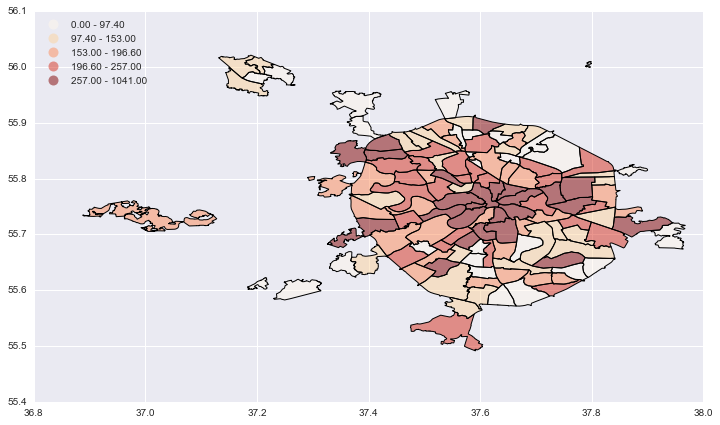

In [0]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equals',legend=True);

Изменим проекцию на Pseudo-Mercator EPSG:3857

In [0]:
district_stats = district_stats.to_crs(epsg=3857)

/usr/local/lib/python3.5/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "equals". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


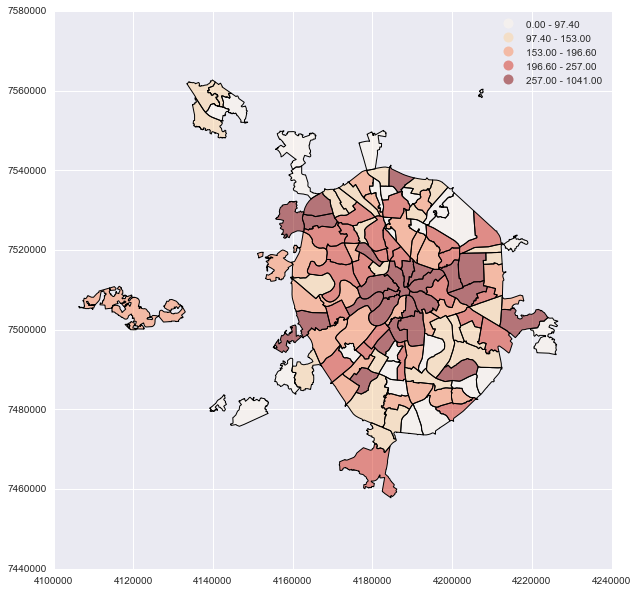

In [0]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equals', legend=True);